## NAME: MUHAMMED SHIBIL C V
## ROLL: CB.SC.P2DSC23007

### 1. Write your own function (with comment lines) in Python to compute the following: 
#### User Input: Number of neurons in the input layer, number of hidden layers, number of neurons in the hidden layers. 
#### Assume random weights and activation function as sigmoid. 

#### (a) Compute the output of each hidden layer.
#### (b) Print the following: 
##### Dimension of weight matrix and the input vector for the computation of each hidden layer.                  
##### Output dimension of each hidden layer.

In [11]:
import numpy as np
#calculating output of the hidden layer
def calc_hiddenl_out():
    outs = []
    prev_out = []
    #user i/p for no of neurons in the i/p layer, hidden layer,no of neurons in hidden layer 
    n_inp = int(input('Enter the number of neurons in the input layer: '))
    n_hl = int(input('Enter the number of hidden layers: '))
    #initialize i/p's (Randomly)
    inp_vals = np.random.randint(1, 500, size=(n_inp))

    for i in range(n_hl):
        n_hl_neurons = int(input(f'Enter the number of neurons in hidden layer {i + 1}: '))
        weights = np.random.rand(n_hl_neurons, len(inp_vals)) #initialize weights and biases (Randomly)
        biases = np.random.rand(n_hl_neurons)
        
        hl_out = []
        for j in range(n_hl_neurons): #calculating o/p of each hidden layers
            weighted_sum = np.dot(inp_vals, weights[j]) + biases[j]
            activation = 1 / (1 + np.exp(-weighted_sum)) #sigmoid activation function
            hl_out.append(activation)

        outs.append(hl_out)
        #Dimensions of computation of each hidden layer.
        print(f'Weights matrix dimensions for hidden layer {i + 1}: {np.array(weights).shape}')
        print(f'Input vector dimensions for hidden layer {i + 1}: {np.array(inp_vals).shape}')

        inp_vals = hl_out
    #O/p dimensions
    for idx, out in enumerate(outs):
        print(f'Hidden layer {idx + 1} output: {out}')
        print(f'Output dimensions of hidden layer {idx + 1}: {np.array(out).shape}')

calc_hiddenl_out()


Enter the number of neurons in the input layer: 2
Enter the number of hidden layers: 3
Enter the number of neurons in hidden layer 1: 5
Weights matrix dimensions for hidden layer 1: (5, 2)
Input vector dimensions for hidden layer 1: (2,)
Enter the number of neurons in hidden layer 2: 7
Weights matrix dimensions for hidden layer 2: (7, 5)
Input vector dimensions for hidden layer 2: (5,)
Enter the number of neurons in hidden layer 3: 8
Weights matrix dimensions for hidden layer 3: (8, 7)
Input vector dimensions for hidden layer 3: (7,)
Hidden layer 1 output: [1.0, 1.0, 1.0, 1.0, 1.0]
Output dimensions of hidden layer 1: (5,)
Hidden layer 2 output: [0.8748449236095684, 0.9522126753328294, 0.9481824618306107, 0.9457356339005556, 0.9400369152345085, 0.9719247071462284, 0.9811306779171425]
Output dimensions of hidden layer 2: (7,)
Hidden layer 3 output: [0.9718067662886629, 0.9521294462168758, 0.9308346041602127, 0.9798767852665704, 0.9548923844505782, 0.9820106838233201, 0.9780918594636029,

### 2. Explore the built-in function conv2 in Matlab with the following options: full, valid and 
#### same. Implement all the three functions in Python (without using direct built-in function available for 2D convolution in Python). Validate the implemented functions using a sample input. 
##### For an example, print the result obtained for all the three options using the code implemented in Python and verify the same with the outputs in Matlab. 

## Convolution Full

In [16]:
import numpy as np

def convolution_full():
    # Input size
    r = int(input('Enter input rows: '))
    c = int(input('Enter input columns: '))
    # Input elements
    ip = input(f'Enter {r * c} input elements: ').split()
    inp_matrix = np.array(ip, dtype=int).reshape(r, c)
    
    # Filter size
    fr = int(input('Enter filter rows: '))
    fc = int(input('Enter filter columns: '))
    # Filter elements
    flt = input(f'Enter {fr * fc} filter elements: ').split()
    filter_matrix = np.array(flt, dtype=int).reshape(fr, fc)
    
    # Zero padding 
    inp_matrix = np.pad(inp_matrix, ((fr - 1, fr - 1), (fc - 1, fc - 1)), mode='constant')
    
    # Flip the filter
    filter_matrix = np.flip(filter_matrix)
    
    # Convolution calculation
    result = []
    for i in range(r + fr - 1):
        for j in range(c + fc - 1):
            cell = inp_matrix[i:len(filter_matrix) + i, j:len(filter_matrix[0]) + j]
            total = 0
            for k in range(len(filter_matrix)):
                for l in range(len(filter_matrix[0])):
                    total += cell[k][l] * filter_matrix[k][l]
            result.append(total)
    
    # Final output after passing input through filter
    final_output = np.array(result).reshape(r + fr - 1, c + fc - 1)
    return final_output

convolution_full()


Enter input rows: 3
Enter input columns: 3
Enter 9 input elements: 2 3 4 5 6 7 8 9 8
Enter filter rows: 2
Enter filter columns: 2
Enter 4 filter elements: 1 2 3 4


array([[ 2,  7, 10,  8],
       [11, 33, 43, 30],
       [23, 63, 71, 44],
       [24, 59, 60, 32]])

##### 

## MATLAB

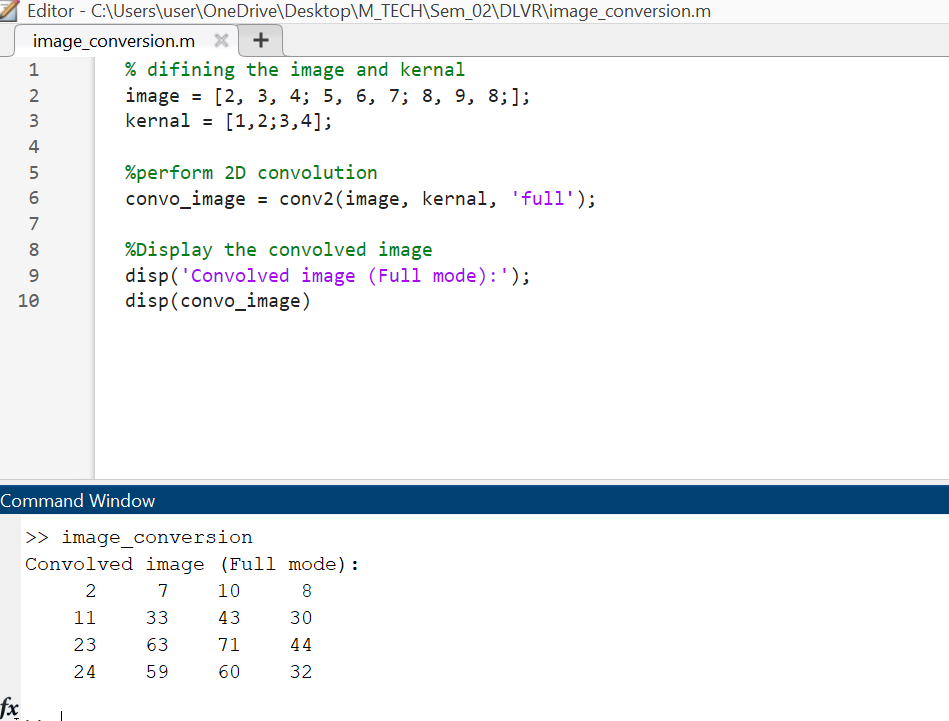

## Convolution Valid

In [19]:
import numpy as np

def convolution_valid():
    # Input size
    r = int(input('Enter input rows: '))
    c = int(input('Enter input columns: '))
    # Input elements
    ip = input(f'Enter {r * c} input elements: ').split()
    inp_matrix = np.array(ip, dtype=int).reshape(r, c)
    
    # Filter size
    fr = int(input('Enter filter rows: '))
    fc = int(input('Enter filter columns: '))
    # Filter elements
    flt = input(f'Enter {fr * fc} filter elements: ').split()
    filter_matrix = np.array(flt, dtype=int).reshape(fr, fc)
    
    # Flip the filter
    filter_matrix = np.flip(filter_matrix)
    
    # Calculate output dimension
    dim = int((r - fr) + 1)
    
    # Check if dimension is valid
    if dim <= 0:
        return []
    else:
        result = []
        # Convolution calculation
        for i in range(dim):
            for j in range(dim):
                cell = inp_matrix[i:len(filter_matrix) + i, j:len(filter_matrix[0]) + j]
                total = 0
                for k in range(len(filter_matrix)):
                    for l in range(len(filter_matrix[0])):
                        total += cell[k][l] * filter_matrix[k][l]
                result.append(total)
        
        # Final output after passing input through filter
        final_output = np.array(result).reshape(dim, dim)
        return final_output

convolution_valid()


Enter input rows: 2
Enter input columns: 2
Enter 4 input elements: 1 2 3 4
Enter filter rows: 2
Enter filter columns: 2
Enter 4 filter elements: 1 2 3 4


array([[20]])

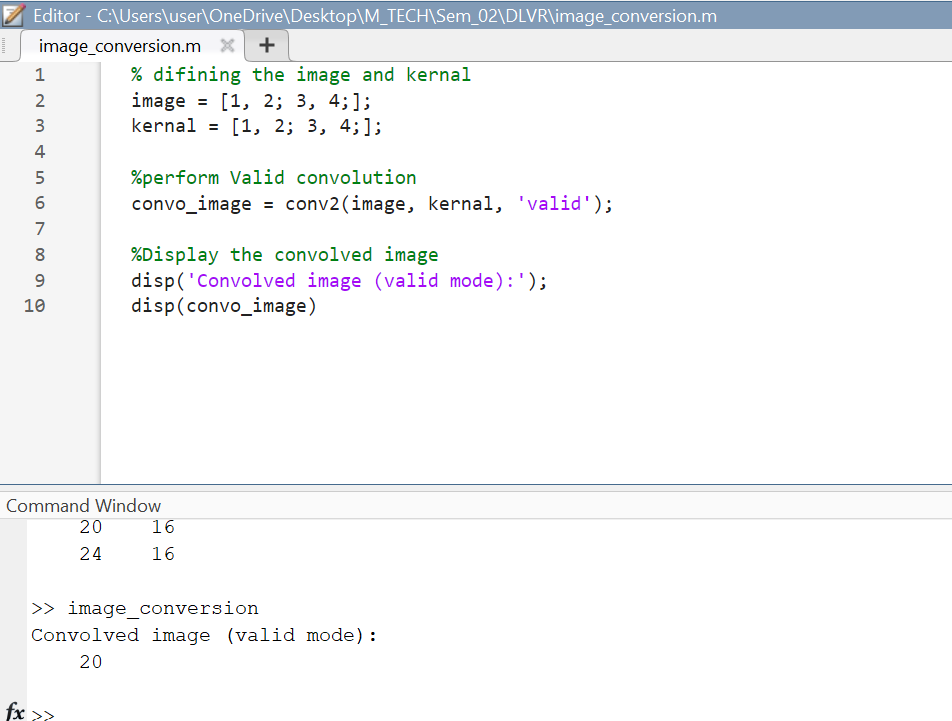

In [23]:
import numpy as np

def s_padding_convo():
    # Input size
    r = int(input('Enter input rows: '))
    c = int(input('Enter input columns: '))
    # Input elements
    ip = input(f'Enter {r * c} input elements: ').split()
    inp_matrix = np.array(ip, dtype=int).reshape(r, c)
    
    # Filter size
    fr = int(input('Enter filter rows: '))
    fc = int(input('Enter filter columns: '))
    # Filter elements
    flt = input(f'Enter {fr * fc} filter elements: ').split()
    filter_matrix = np.array(flt, dtype=int).reshape(fr, fc)
    
    # Zero padding 
    inp_matrix = np.pad(inp_matrix, ((fr - 1, fr - 1), (fc - 1, fc - 1)), mode='constant')
    
    # Flip the filter
    filter_matrix = np.flip(filter_matrix)
    
    # Convolution calculation
    result = []
    for i in range(r + fr - 1):
        for j in range(c + fc - 1):
            cell = inp_matrix[i:len(filter_matrix) + i, j:len(filter_matrix[0]) + j]
            total = 0
            for k in range(len(filter_matrix)):
                for l in range(len(filter_matrix[0])):
                    total += cell[k][l] * filter_matrix[k][l]
            result.append(total)
    
    # Final output after passing input through filter
    final_output = np.array(result).reshape(r + fr - 1, c + fc - 1)
    
    # Adjust for same size convolution
    if fr % 2 != 0:
        pad = int((fr - 1) / 2)
        final_output = final_output[pad:len(final_output) - pad, pad:len(final_output[0]) - pad]
    else:
        pad = int(fr / 2)
        final_output = final_output[pad:len(final_output) - pad + 1, pad:len(final_output[0]) - pad + 1]
    
    return final_output

s_padding_convo()


Enter input rows: 2
Enter input columns: 2
Enter 4 input elements: 2 4 6 8
Enter filter rows: 2
Enter filter columns: 2
Enter 4 filter elements: 1 3 5 7


array([[60, 52],
       [82, 56]])

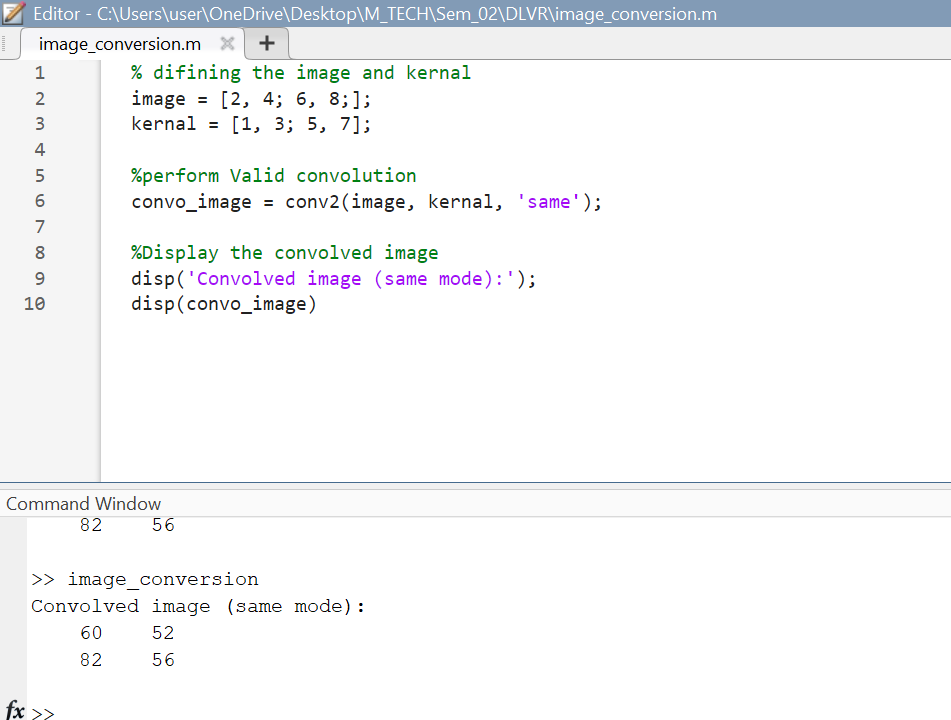